In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
!pip install mne
import tensorflow as tf

import scipy.io
import numpy as np
import mne
import os
import gym
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

In [48]:
raw = mne.io.read_raw_gdf('/content/drive/MyDrive/a/data/A01T.gdf',eog=['EOG-left', 'EOG-central', 'EOG-right'],preload=True)

Extracting EDF parameters from /content/drive/MyDrive/a/data/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/usr/local/lib/python3.10/dist-packages/mne/io/edf/edf.py:1423: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [49]:
original = raw.info['ch_names']
print(original)
raw.drop_channels(original[0:6])
raw.drop_channels(original[13:])
raw.drop_channels(['EEG-5','EEG-6','EEG-7','EEG-8'])
print(raw.info['ch_names'])
raw.filter(0.1, 50, fir_design='firwin')

['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']
['EEG-C3', 'EEG-Cz', 'EEG-C4']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 8251 samples (33.004 s)



Measurement date,"January 17, 2005 12:00:00 GMT"
Experimenter,Unknown
Participant,A01
Digitized points,Not available
Good channels,3 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.50 Hz
Lowpass,50.00 Hz


In [50]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [51]:
events

(array([[     0,      0,      5],
        [     0,      0,      3],
        [ 29683,      0,      5],
        ...,
        [670550,      0,      6],
        [670550,      0,      1],
        [671050,      0,      7]]),
 {'1023': 1,
  '1072': 2,
  '276': 3,
  '277': 4,
  '32766': 5,
  '768': 6,
  '769': 7,
  '770': 8,
  '771': 9,
  '772': 10})

In [52]:
events[0][0:20]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       [ 29683,      0,      4],
       [ 49955,      0,      5],
       [ 49955,      0,      2],
       [ 91518,      0,      5],
       [ 91868,      0,      6],
       [ 92368,      0,     10],
       [ 93871,      0,      6],
       [ 94371,      0,      9],
       [ 95789,      0,      6],
       [ 96289,      0,      8],
       [ 97741,      0,      6],
       [ 98241,      0,      7],
       [ 99749,      0,      6],
       [100249,      0,      7],
       [101860,      0,      6],
       [102360,      0,      8],
       [103777,      0,      6]])

In [53]:
event_dict = {
    'reject':1,
    'eye move':2,
    'eye open': 3,
    'eye close' : 4,
    'new run': 5,
    'new trial':6,
    'class 1':7,
    'class 2':8,
    'class 3':9,
    'class 4':10
}

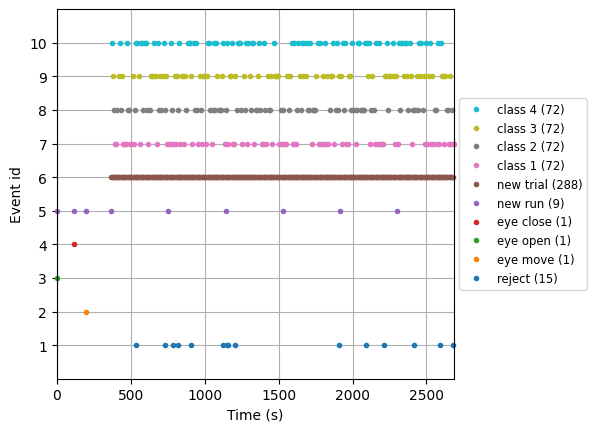

In [54]:
fig = mne.viz.plot_events(events[0],event_id = event_dict, sfreq = raw.info['sfreq'],first_samp=raw.first_samp)

In [55]:
epoch = mne.Epochs(raw,events[0],event_id=[7,8],baseline=None,tmin=2,tmax=6)
epoch.get_data().shape

Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1001 original time points ...
1 bad epochs dropped


(143, 3, 1001)

In [56]:
labels = epoch.events[:,-1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
labels

array([8, 7, 7, 8, 8, 7, 7, 7, 8, 8, 7, 7, 7, 8, 7, 8, 8, 7, 8, 7, 8, 8,
       8, 7, 7, 7, 8, 7, 7, 8, 7, 7, 8, 7, 8, 8, 7, 8, 7, 7, 8, 7, 8, 8,
       8, 8, 8, 7, 8, 7, 7, 7, 8, 8, 7, 8, 7, 8, 7, 8, 8, 8, 7, 7, 8, 7,
       8, 8, 7, 7, 8, 7, 8, 7, 7, 8, 7, 7, 7, 8, 8, 8, 8, 7, 8, 8, 8, 7,
       7, 7, 7, 7, 8, 7, 8, 8, 7, 8, 7, 7, 8, 8, 8, 7, 8, 8, 8, 8, 8, 7,
       8, 8, 7, 7, 7, 7, 7, 7, 8, 7, 7, 8, 8, 7, 8, 8, 8, 8, 8, 7, 7, 7,
       7, 8, 8, 7, 7, 7, 8, 8, 7, 7, 8])

In [58]:
evoked_1 = epoch['7'].average()
evoked_2 = epoch['8'].average()



In [59]:
dicts = {
    'left':evoked_1,
    'right':evoked_2,
}

In [60]:
events

(array([[     0,      0,      5],
        [     0,      0,      3],
        [ 29683,      0,      5],
        ...,
        [670550,      0,      6],
        [670550,      0,      1],
        [671050,      0,      7]]),
 {'1023': 1,
  '1072': 2,
  '276': 3,
  '277': 4,
  '32766': 5,
  '768': 6,
  '769': 7,
  '770': 8,
  '771': 9,
  '772': 10})

In [61]:
import mne
from mne.decoding import CSP
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline

epochs = mne.Epochs(raw, events[0], event_id=[7,8], tmin=1.75, tmax=6.25, baseline=None, preload=True)

# Apply baseline correction
#epochs.apply_baseline(baseline=(None, 0))

# Pick EEG channels
epochs.pick_types(meg=False, eeg=True)

# Get the data and labels
X = epochs.get_data()
y = epochs.events[:, -1]

# Set up CSP and classifier pipeline
csp = CSP(n_components=4, norm_trace=False,reg=None,log=False)
svc = SVC(kernel='rbf')
lda = LDA(solver='svd')
#clf = make_pipeline(csp, StandardScaler(), lda)
clf = Pipeline([('CSP', csp), ('scaler',StandardScaler()), ('LDA', lda)])
# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print("Classification accuracy: %f" % scores.mean())

Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1125 original time points ...
1 bad epochs dropped
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Computing rank from data with rank=None
    Using tolerance 2.3e-05 (2.2e-16 eps * 3 dim * 3.5e+10  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-06 (2.2e-16 eps * 3 dim * 4.8e+09  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None


<ipython-input-61-ad39dc3ee4fa>:19: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = epochs.get_data()


    Using tolerance 2.3e-05 (2.2e-16 eps * 3 dim * 3.5e+10  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-06 (2.2e-16 eps * 3 dim * 4.8e+09  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.3e-05 (2.2e-16 eps * 3 dim * 3.5e+10  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 3.2e-06 (2.2e-16 eps * 3 dim * 4.8e+09  max singular value)
    Estimated rank (mag): 3
    MAG: rank 3 computed from 3

Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1125 original time points ...
1 bad epochs dropped


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


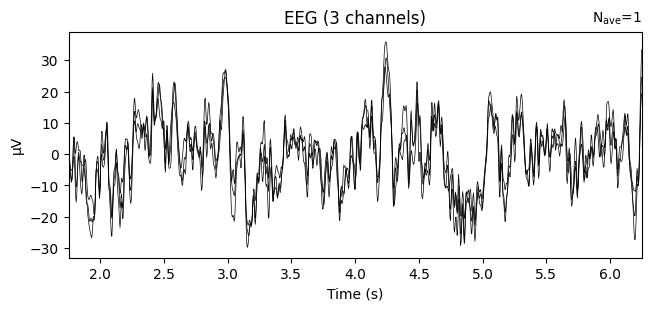

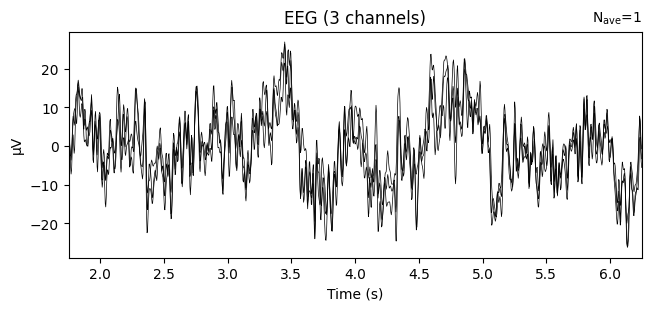

Fitting ICA to data using 3 channels (please be patient, this may take a while)
Selecting by number: 3 components
Fitting ICA took 1.4s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroing out 0 ICA components
    Projecting back using 3 PCA components


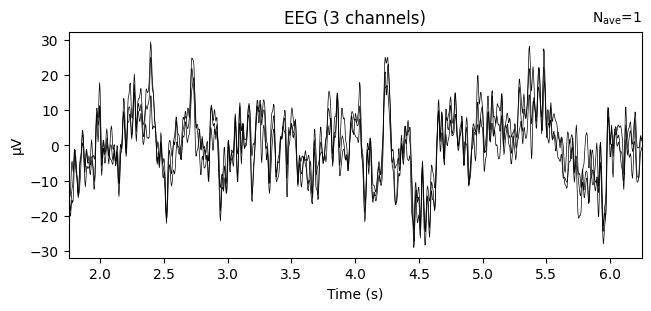

Fitting ICA to data using 3 channels (please be patient, this may take a while)
Selecting by number: 3 components
Fitting ICA took 1.5s.
Applying ICA to Raw instance
    Transforming to ICA space (3 components)
    Zeroing out 0 ICA components
    Projecting back using 3 PCA components


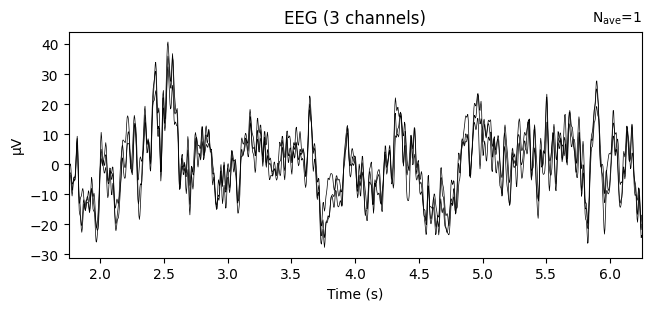

In [62]:
epochs = mne.Epochs(raw, events[0], event_id=[7,8], tmin=1.75, tmax=6.25, baseline=None, preload=True)

# Select epochs for a specific label, here we choose 'Class1' which corresponds to the label '7'
selected_epochs = epochs['7']

# Choose one epoch to plot, here we take the first epoch for label '7'
for i in range(2):
  epoch_to_plot = selected_epochs[i].average()

  # Plot the epoch
  epoch_to_plot.plot()

selected_epochs = epochs['8']

# Choose one epoch to plot, here we take the first epoch for label '7'
for i in range(2):
  epoch_to_plot = selected_epochs[i].average()
  ica = mne.preprocessing.ICA(n_components=len(raw.info['ch_names']), random_state=97, max_iter=800)
  ica.fit(raw)

    # Identify artifactual components (e.g., using correlation with EOG channels)
    # This step might need manual intervention or more sophisticated methods
    # eog_indices, eog_scores = ica.find_bads_eog(raw)
    # ica.exclude = eog_indices

    # Apply the ICA solution to the raw data
  ica.apply(raw)
  # Plot the epoch
  epoch_to_plot.plot()

combining channels using "gfp"
combining channels using "gfp"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


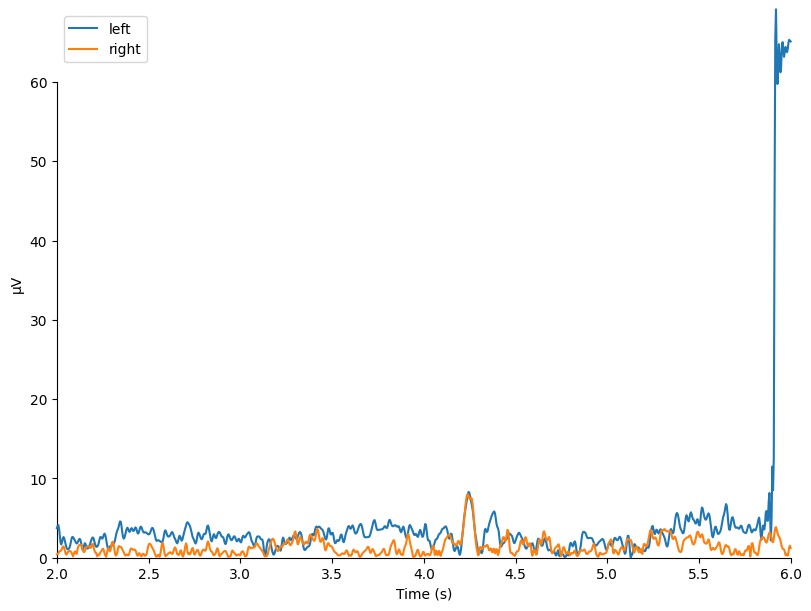

[<Figure size 800x600 with 1 Axes>]

In [63]:
mne.viz.plot_compare_evokeds(dicts)

In [64]:
import mne

def read_data(path):
    print('GDF PATH', path)
    raw = mne.io.read_raw_gdf(path, eog=['EOG-left', 'EOG-central', 'EOG-right'], preload=True, verbose=False)

    # Drop EOG channels
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

    # Drop additional channels
    original = raw.info['ch_names']
    raw.drop_channels(original[0:6])
    raw.drop_channels(original[13:])
    raw.drop_channels(['EEG-5','EEG-6','EEG-7','EEG-8'])
    # Set EEG reference
    raw.set_eeg_reference()

    # Apply bandpass filter
    low_freq = 0.1  # Low cut-off frequency in Hz
    high_freq = 50.0  # High cut-off frequency in Hz
    raw.filter(low_freq, high_freq, fir_design='firwin')
    # ica = mne.preprocessing.ICA(n_components=len(raw.info['ch_names']), random_state=97, max_iter=800)
    # ica.fit(raw)

    # Identify artifactual components (e.g., using correlation with EOG channels)
    # This step might need manual intervention or more sophisticated methods
    # eog_indices, eog_scores = ica.find_bads_eog(raw)
    # ica.exclude = eog_indices

    # Apply the ICA solution to the raw data
    # ica.apply(raw)

    # Extract events
    events = mne.events_from_annotations(raw)

    # Create epochs
    epoch = mne.Epochs(raw, events[0], event_id=[7, 8, 9, 10], baseline=None,tmin=1, tmax=7, on_missing='warn', verbose=False)

    # Extract labels and data
    labels = epoch.events[:, -1]
    d = epoch.get_data()

    return labels, np.array(d)


In [65]:
%%capture
for filename in os.listdir('/content/drive/MyDrive/a/data'):
    if('.mat' in filename):
        filepath = os.path.join('/content/drive/MyDrive/a/data', filename)
        data = scipy.io.loadmat(filepath)
        data.pop('__header__')
        data.pop('__version__')
        data.pop('__globals__')
        arr = np.array(data['classlabel']).flatten()
        arr = np.array([(i-1) for i in arr])
        print(f'THIS IS THE DATA OF .MAT FILE {filename}',arr)

In [66]:
%%capture
import os
train_dict = {}
test_dict = {}
def read_labels(f):
    #filepath = os.path.join('data', f)
    #print('MAT FILE',filename)
    data = scipy.io.loadmat(f)
    arr = np.array(data['classlabel']).flatten()
    arr = np.array([(i-1) for i in arr])
    return arr

sorted_filenames = [
    "A01E.gdf", "A01E.mat", "A01T.gdf", "A01T.mat",
    "A02E.gdf", "A02E.mat", "A02T.gdf", "A02T.mat",
    "A03E.gdf", "A03E.mat", "A03T.gdf", "A03T.mat",
    "A04E.gdf", "A04E.mat", "A04T.gdf", "A04T.mat",
    "A05E.gdf", "A05E.mat", "A05T.gdf", "A05T.mat",
    "A06E.gdf", "A06E.mat", "A06T.gdf", "A06T.mat",
    "A07E.gdf", "A07E.mat", "A07T.gdf", "A07T.mat",
    "A08E.gdf", "A08E.mat", "A08T.gdf", "A08T.mat",
    "A09E.gdf", "A09E.mat", "A09T.gdf", "A09T.mat"
]
directory_path = '/content/drive/MyDrive/a/data'
for fname in sorted_filenames:
    if('.gdf' in fname):
        f = os.path.join(directory_path, fname)
        _, data = read_data(f)
        #labels = np.array([(i-7) for i in labels])
        if 'T' in fname:
            print('T', f)

            if fname not in train_dict:
                train_dict[fname] = {'data': [], 'labels': []}

            train_dict[fname]['data'].append(data)
            #train_dict[fname]['labels'].append(labels)
            train_dict[fname]['data'] = np.array(train_dict[fname]['data']).squeeze(axis=0)
            #train_dict[fname]['labels'] = np.array(train_dict[fname]['labels']).squeeze(axis=0)

        elif 'E' in fname:
            print('E', f)

            if fname not in test_dict:
                test_dict[fname] = {'data': [], 'labels': []}
            test_dict[fname]['data'].append(data)
            #test_dict[fname]['labels'].append(labels)
            test_dict[fname]['data'] = np.array(test_dict[fname]['data']).squeeze(axis=0)
            #test_dict[fname]['labels'] = np.array(test_dict[fname]['labels']).squeeze(axis=0)

    elif('.mat' in fname):
        gdf_file = fname[:-4] + ('.gdf')
        #print('GDFGDGDF FILE',gdf_file)
        labels = read_labels('/content/drive/MyDrive/a/data/'+fname)
        #labels = np.array([(i-7) for i in labels])
        if 'T' in gdf_file:
            #print('T', f)

            if gdf_file not in train_dict:
                train_dict[gdf_file] = {'data': [], 'labels': []}


            train_dict[gdf_file]['labels'].append(labels)

            train_dict[gdf_file]['labels'] = np.array(train_dict[gdf_file]['labels']).squeeze(axis=0)

        elif 'E' in gdf_file:
            #print('E', f)

            if gdf_file not in test_dict:
                test_dict[gdf_file] = {'data': [], 'labels': []}

            test_dict[gdf_file]['labels'].append(labels)

            test_dict[gdf_file]['labels'] = np.array(test_dict[gdf_file]['labels']).squeeze(axis=0)


In [67]:
for fname, data_labels in train_dict.items():
    # data_labels is a dictionary with keys 'data' and 'labels'
    data = data_labels['data']
    print(data.shape)
    labels = data_labels['labels']
    data_labels['labels'] = labels[:data.shape[0]]

for fname, data_labels in train_dict.items():
    # data_labels is a dictionary with keys 'data' and 'labels'
    data = data_labels['data']
    labels = data_labels['labels']
    print(data.shape, labels.shape)
    print(labels)


for fname, data_labels in test_dict.items():
    # data_labels is a dictionary with keys 'data' and 'labels'
    data = data_labels['data']
    print(data.shape)
    labels = data_labels['labels']
    data_labels['labels'] = labels[:data.shape[0]]

for fname, data_labels in test_dict.items():
    # data_labels is a dictionary with keys 'data' and 'labels'
    data = data_labels['data']
    labels = data_labels['labels']
    print(data.shape, labels.shape)
    print(labels)

(287, 3, 1501)
(287, 3, 1501)
(287, 3, 1501)
(144, 3, 1501)
(287, 3, 1501)
(287, 3, 1501)
(287, 3, 1501)
(287, 3, 1501)
(287, 3, 1501)
(287, 3, 1501) (287,)
[3 2 1 0 0 1 2 3 1 2 0 0 0 3 1 1 0 0 2 0 1 3 3 2 0 3 3 1 3 3 1 0 1 2 2 2 3
 2 0 3 1 2 1 2 3 1 2 0 0 0 3 1 0 2 0 2 1 3 0 2 2 0 2 1 3 3 3 2 0 3 1 3 1 0
 2 1 0 2 2 0 2 3 3 1 0 1 3 1 3 2 1 1 1 2 3 0 1 3 0 2 2 3 0 0 2 1 3 3 3 1 0
 2 1 3 0 3 2 1 3 3 0 1 1 2 3 1 0 0 3 1 0 2 1 1 2 0 3 2 2 2 2 0 1 0 1 0 0 2
 2 1 2 3 0 3 0 0 1 3 2 1 3 2 3 2 3 1 1 3 0 1 1 1 2 3 0 3 0 2 0 3 0 2 0 1 2
 2 3 0 1 3 1 2 2 0 3 1 3 0 0 2 2 1 3 1 1 0 1 3 3 1 1 1 1 3 3 2 3 0 1 2 1 0
 3 0 3 0 0 0 0 2 2 3 1 2 2 2 3 2 0 2 0 3 1 3 3 2 3 3 2 1 3 2 0 1 1 1 2 1 3
 2 3 1 2 0 3 0 2 3 0 2 0 1 1 0 3 0 3 2 2 0 2 1 1 0 2 0 1]
(287, 3, 1501) (287,)
[0 1 1 0 1 0 1 2 1 3 0 2 1 0 3 3 3 3 3 0 2 1 0 0 2 3 0 2 2 2 0 1 0 1 1 0 1
 2 1 2 2 3 2 2 3 3 3 3 3 2 1 0 0 1 2 3 1 2 0 0 0 3 1 1 0 0 2 0 1 3 3 2 0 3
 3 1 3 3 1 0 1 2 2 2 3 2 0 3 1 2 1 2 3 1 2 0 0 0 3 1 0 2 0 2 1 3 0 2 2 0 2
 1 3 3 3 2 0 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
!pip install pywavelets
import pywt
#Functions for features
from scipy import stats
def mean(x):
    return np.mean(x,axis=-1)

def stddev(x):
    return np.std(x, axis=-1)

def peaktopeak(x):
    return np.ptp(x, axis=-1)

def variance(x):
    return np.var(x, axis=-1)

def mini(x):
    return np.min(x,axis=-1)

def maxi(x):
    return np.max(x,axis=-1)

def argmini(x):
    return np.argmin(x,axis=-1)

def argmaxi(x):
    return np.argmax(x,axis=-1)

def rms(x):
    return np.sqrt(np.mean(x**2,axis=-1))

def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x,axis=-1)),axis=-1)

def skewness(x):
    return stats.skew(x,axis=-1)

def kurtosis(x):
    return stats.kurtosis(x,axis=-1)

def wavelet_entropy(x):
    coeffs = pywt.wavedec(x, 'db4', level=4)
    entropy_list = []

    for c in coeffs:
        # Ensure c is squared and non-zero before taking log
        c_squared = np.square(c)
        c_squared_nonzero = np.where(c_squared == 0, np.finfo(float).eps, c_squared)
        entropy = -np.sum(c_squared_nonzero * np.log(c_squared_nonzero), axis=-1)
        entropy_list.append(entropy)

    # If x is multi-channel, entropy_list will be a list of arrays
    # We need to average across all channels
    entropy_array = np.array(entropy_list)

    # Handle multi-channel data: average across channels (axis=0)
    if entropy_array.ndim > 1:
        entropy_avg = np.mean(entropy_array, axis=0)
    else:
        entropy_avg = entropy_array

    return entropy_avg

def hjorth_activity(x):
    return np.var(x, axis=-1)

def hjorth_mobility(x):
    return np.sqrt(np.var(np.diff(x, axis=-1), axis=-1) / np.var(x, axis=-1))

def hjorth_complexity(x):
    return hjorth_mobility(np.diff(x, axis=-1)) / hjorth_mobility(x)

def stft_features(channel_data, fs=500, nperseg=256, noverlap=128):
    stft_features_all_channels = []

    for channel in channel_data:
        f, t, Zxx = scipy.signal.stft(channel, fs=fs, nperseg=nperseg, noverlap=noverlap)
        magnitude = np.abs(Zxx)
        avg_magnitude = np.mean(magnitude, axis=-1)
        stft_features_all_channels.append(avg_magnitude)
    return np.concatenate(stft_features_all_channels)


def concat_features(x):
    return np.concatenate((
        kurtosis(x),
        stft_features(x)  # Add STFT features
    ), axis=-1)

def featuresarray_load(data_array):
    #print(data_array.shape)
    features = []
    fs = 500
    for d in data_array:
        theta = mne.filter.filter_data(d, sfreq=fs, l_freq=4, h_freq=8,verbose=False)
        alpha = mne.filter.filter_data(d, sfreq=fs, l_freq=8, h_freq=12,verbose=False)
        beta = mne.filter.filter_data(d, sfreq=fs, l_freq=12, h_freq=30,verbose=False)
        alph_ftrs = concat_features(alpha)
        beta_ftrs = concat_features(beta)
        theta_ftrs = concat_features(theta)

        f,p1 = scipy.signal.welch(alpha, fs=fs, average = 'median')
        f,p2 = scipy.signal.welch(beta, fs=fs, average = 'median')

        #weights = np.array([0.8,0.8,0.4])  # Example weights
        res = np.mean((alph_ftrs, beta_ftrs, theta_ftrs), axis=0)

        psd = np.vstack([p1[0,:],p2[1,:],p1[2,:],p2[1,:]])
        psd = np.mean(psd,axis=0)
        res = np.concatenate((res, psd))
        features.append(res)
    return features

def process_and_save_features(data_dict, file_prefix):
    for fname, data_labels in data_dict.items():
        data_array = data_labels['data']
        features = featuresarray_load(data_array)
        f = np.array(features)
        np.save(f"/content/drive/MyDrive/a/{file_prefix}_{fname}.npy", allow_pickle=False, arr=f)


# process_and_save_features(train_dict, "bciiv2a_train_features")
# process_and_save_features(test_dict, "bciiv2a_test_features")

In [69]:
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, LayerNormalization, Reshape, AveragePooling1D
from keras.optimizers import Adam,SGD
from keras.metrics import categorical_crossentropy
from keras.backend import clear_session
from matplotlib.ticker import MultipleLocator
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import math
from imblearn.over_sampling import SMOTE
from cvxopt import matrix, solvers

prefix='/content/drive/MyDrive/a/'
X_train,X_test = np.load(file=prefix+"bciiv2a_train_features_A01T.gdf.npy"), np.load(file=prefix+"bciiv2a_test_features_A01E.gdf.npy")
#X_train2,X_test2 = np.load(file=prefix+"bciiv2a_train_features_A02T.gdf.npy"), np.load(file=prefix+"bciiv2a_test_features_A02E.gdf.npy")
#X_train = np.concatenate((X_train,X_train2))

y_train,y_test = train_dict['A01T.gdf']['labels'],test_dict['A01E.gdf']['labels']
#y_train2,y_test2 = train_dict['A02T.gdf']['labels'],test_dict['A02E.gdf']['labels']
#y_train = np.concatenate((y_train,y_train2))


indices_to_remove_train = np.where(y_train == 3)[0]
indices_to_remove_test = np.where(y_test == 3)[0]
X_train = np.delete(X_train, indices_to_remove_train, axis=0)
y_train = np.delete(y_train, indices_to_remove_train, axis=0)
X_test = np.delete(X_test, indices_to_remove_test, axis=0)
y_test = np.delete(y_test, indices_to_remove_test, axis=0)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)
# indices_to_remove_train = np.where(y_train == 2)[0]
# indices_to_remove_test = np.where(y_test == 2)[0]
# X_train = np.delete(X_train, indices_to_remove_train, axis=0)
# y_train = np.delete(y_train, indices_to_remove_train, axis=0)
# X_test = np.delete(X_test, indices_to_remove_test, axis=0)
# y_test = np.delete(y_test, indices_to_remove_test, axis=0)
scaler = StandardScaler()
smote = SMOTE(sampling_strategy='all', k_neighbors=50, random_state=42)
# X_combined = np.concatenate((X_train, X_test))
# y_combined = np.concatenate((y_train, y_test))
X_syn,y_syn = smote.fit_resample(X_test,y_test)

# X_combined = np.concatenate((X_combined,X_syn))
# y_combined = np.concatenate((y_combined,y_syn))

# X_train, X_test, y_train, y_test = train_test_split(
#     X_combined, y_combined, test_size=0.25, random_state=42, shuffle=True, stratify=y_combined)
X_train = np.concatenate((X_train,X_syn))
y_train = np.concatenate((y_train,y_syn))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)
GLOBAL_SHAPE_LENGTH = X_train.shape[1]



(215, 519) (215, 519) (215,) (215,)
(431, 519) (215, 519) (431,) (215,)


In [71]:
X_train = X_train[:,:X_test.shape[1]]
GLOBAL_SHAPE_LENGTH = X_train.shape[1]
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(431, 519) (431,) (215, 519) (215,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
scaler2 = MinMaxScaler((0,1))
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

In [73]:
import numpy as np
import matplotlib.pyplot as plt

for _ in range(25):

  sample_index_train = random.randint(0, len(X_train) - 1)
  train_sample = X_train[sample_index_train]
  train_label = y_train[sample_index_train]

  match_indices = np.where(y_test == train_label)[0]
  sample_index_test = random.choice(match_indices)
  test_sample = X_test[sample_index_test]


  feature_axis = np.arange(len(train_sample))


  plt.figure(figsize=(24, 6))

  # Plot train sample
  plt.subplot(1, 2, 1)
  plt.plot(feature_axis, train_sample)
  plt.title(f"Train Sample {sample_index_train}, Label {y_train[sample_index_train]}")
  plt.xlabel("Feature Index")
  plt.ylabel("Feature Value")
  plt.ylim((0,1))
  plt.grid(True)

  # Plot test sample
  plt.subplot(1, 2, 2)
  plt.plot(feature_axis, test_sample)
  plt.title(f"Test Sample {sample_index_test}, Label {y_test[sample_index_test]}")
  plt.xlabel("Feature Index")
  plt.ylabel("Feature Value")
  plt.ylim((0,1))
  plt.grid(True)

  plt.show()


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
lst = y_train.tolist()
print(lst.count(0),lst.count(1),lst.count(2),lst.count(3),GLOBAL_SHAPE_LENGTH)
lst = y_test.tolist()
print(lst.count(0),lst.count(1),lst.count(2),lst.count(3),GLOBAL_SHAPE_LENGTH)

Output hidden; open in https://colab.research.google.com to view.

In [74]:
import tensorflow.keras.backend as K
import tensorflow as tf
from keras.layers import Layer
@keras.saving.register_keras_serializable()
class LightweightLSTMAttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(LightweightLSTMAttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight',
                                 shape=(input_shape[-1], 1),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(name='att_bias',
                                 shape=(input_shape[1], 1),
                                 initializer='zeros',
                                 trainable=True)
        super(LightweightLSTMAttentionLayer, self).build(input_shape)

    def call(self, x):
        # Attention mechanism
        e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.squeeze(e, axis=-1)
        alpha = K.softmax(e)
        alpha = K.expand_dims(alpha, axis=-1)

        # Apply the attention
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])


from tensorflow.keras.layers import Layer, Dense, Softmax, Permute, Multiply
import tensorflow as tf
@keras.saving.register_keras_serializable()
class LightweightConv1DAttention(Layer):
    def __init__(self, **kwargs):
        super(LightweightConv1DAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.attention_dense = Dense(input_shape[-1], activation='tanh')
        self.attention_softmax = Softmax(axis=-1)
        super(LightweightConv1DAttention, self).build(input_shape)

    def call(self, inputs):
        # Compute raw attention scores
        attention_scores = self.attention_dense(inputs)

        # Apply softmax to get attention weights
        attention_weights = self.attention_softmax(attention_scores)

        # Apply attention weights
        weighted_output = Multiply()([inputs, attention_weights])

        return weighted_output

    def compute_output_shape(self, input_shape):
        return input_shape

In [75]:
from keras.layers import SpatialDropout1D,AveragePooling1D
from keras.regularizers import l1_l2
from keras.backend import clear_session
clear_session()
model = Sequential([
      Reshape((GLOBAL_SHAPE_LENGTH,1)),
      BatchNormalization(),

      Conv1D(64, kernel_size=7, activation='relu'),
      BatchNormalization(),

      MaxPooling1D(pool_size=2),
      SpatialDropout1D(0.1),

      Conv1D(128, kernel_size=5, activation='relu'),
      BatchNormalization(),

      AveragePooling1D(pool_size=2),
      SpatialDropout1D(0.1),

      Conv1D(256, kernel_size=3, activation='relu',kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
      BatchNormalization(),

      MaxPooling1D(pool_size=2),
      SpatialDropout1D(0.1),

      LSTM(256, activation='tanh', recurrent_regularizer=l1_l2(l1=0.01, l2=0.01),return_sequences=True),
      BatchNormalization(),
      LightweightLSTMAttentionLayer(),
      Flatten(),
      BatchNormalization(),
      Dense(units=256, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
      BatchNormalization(),
      Dropout(0.1),
      Dense(units=128, activation='relu'),
      BatchNormalization(),
      Dropout(0.1),
      Dense(units=3, activation='softmax')
])
X_train_reshape = X_train.reshape(*X_train.shape,1)
X_test_reshape = X_test.reshape(*X_test.shape,1)
print(X_train_reshape.shape)
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0055,decay=1e-3),loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.load_weights(prefix+'test4_myweights_goodmodel')
with tf.device(device_name):
  model.fit(X_train_reshape,y_train,validation_split=0.25,epochs=400)


(431, 519, 1)
Train on 323 samples, validate on 108 samples
Epoch 1/400
323/323 [==============================] - ETA: 0s - loss: 1.9448 - accuracy: 0.9381

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


323/323 [==============================] - 4s 11ms/sample - loss: 1.9448 - accuracy: 0.9381 - val_loss: 4.0989 - val_accuracy: 0.4537
Epoch 2/400
323/323 [==============================] - 1s 2ms/sample - loss: 1.8434 - accuracy: 0.9721 - val_loss: 4.0841 - val_accuracy: 0.4537
Epoch 3/400
323/323 [==============================] - 1s 2ms/sample - loss: 1.7515 - accuracy: 0.9628 - val_loss: 3.9305 - val_accuracy: 0.4630
Epoch 4/400
323/323 [==============================] - 1s 2ms/sample - loss: 1.7124 - accuracy: 0.9536 - val_loss: 3.7210 - val_accuracy: 0.4722
Epoch 5/400
323/323 [==============================] - 1s 2ms/sample - loss: 1.6366 - accuracy: 0.9721 - val_loss: 3.6651 - val_accuracy: 0.4907
Epoch 6/400
323/323 [==============================] - 1s 2ms/sample - loss: 1.5934 - accuracy: 0.9474 - val_loss: 3.6423 - val_accuracy: 0.4815
Epoch 7/400
323/323 [==============================] - 1s 2ms/sample - loss: 1.5367 - accuracy: 0.9505 - val_loss: 3.6793 - val_accuracy: 0.5

In [76]:
print(model.evaluate(X_test_reshape,y_test)[1])
print(model.evaluate(np.concatenate((X_train_reshape,X_test_reshape)),np.concatenate((y_train,y_test)))[1])
model.save_weights(prefix+'test4_myweights_goodmodel')

0.7255814
0.81578946


In [77]:
smote = SMOTE(sampling_strategy='all', random_state=42, k_neighbors=40)
X_syn2, y_syn2 = smote.fit_resample(X_test,y_test)
X_syn2 = scaler.transform(X_syn2)
X_syn2 = scaler2.transform(X_syn2)
print(X_syn2.shape,y_syn2.shape)

(216, 519) (216,)


In [78]:
import gym
import numpy as np
import random

class Plasticity(gym.Env):
  #dataset=(X_train, y_train)
    def __init__(self, images_per_episode=1, dataset=(X_train, y_train), random=True):
        super().__init__()

        self.action_space = gym.spaces.Discrete(3)
        self.observation_space = gym.spaces.Box(low=0, high=1,
                                                shape=(GLOBAL_SHAPE_LENGTH, 1),
                                                dtype=np.float32)
        self.images_per_episode = images_per_episode
        self.step_count = 0

        self.x, self.y = dataset
        self.random = random
        self.dataset_idx = 0

        # Reward and penalty parameters
        self.initial_reward = 1
        self.final_reward = 15  # Example final reward
        self.reward_increment = 0.1  # Increment for reward

        self.initial_penalty = -1
        self.final_penalty = -15  # Example final penalty
        self.penalty_increment = -1/1500.0  # Increment for penalty

        self.current_reward = self.initial_reward
        self.current_penalty = self.initial_penalty

    def step(self, action):
        done = False
        reward = self.calculate_reward(action)

        obs = self._next_obs()

        self.step_count += 1
        if self.step_count >= self.images_per_episode:
            done = True

        return obs, reward, done, {}

    def reset(self):
        self.step_count = 0

        # Update reward and penalty values
        #self.update_reward_penalty()

        obs = self._next_obs()
        return obs

    def _next_obs(self):
        if self.random:
            next_obs_idx = random.randint(0, len(self.x) - 1)
            self.expected_action = int(self.y[next_obs_idx])
            obs = self.x[next_obs_idx]
        else:
            obs = self.x[self.dataset_idx]
            self.expected_action = int(self.y[self.dataset_idx])

            self.dataset_idx += 1
            if self.dataset_idx >= len(self.x):
                raise StopIteration()

        return obs

    def calculate_reward(self, action):
      if action == self.expected_action:
          reward = 1
      else:
          reward = 0 #self.current_penalty

      return reward

    def update_reward_penalty(self):
        # # Update reward
        # if self.current_reward < self.final_reward:
        #     self.current_reward += self.reward_increment
        #     self.current_reward = min(self.current_reward, self.final_reward)

        # Update penalty
        if self.current_penalty > self.final_penalty:
            self.current_penalty += self.penalty_increment
            self.current_penalty = max(self.current_penalty, self.final_penalty)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Input
from tensorflow.keras.optimizers import Adam
tf.compat.v1.experimental.output_all_intermediates(True)

In [80]:
env = Plasticity()
states = env.observation_space.shape
actions = env.action_space.n
print(env.action_space)
print(states,actions)

Discrete(3)
(519, 1) 3


In [81]:
from tensorflow.keras.layers import Conv1D, Dropout, AveragePooling1D, SpatialDropout1D, MaxPooling1D, BatchNormalization, LSTM, Flatten, Dense, LeakyReLU, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from keras.regularizers import l1_l2
@keras.saving.register_keras_serializable()
class LightweightLSTMAttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(LightweightLSTMAttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight',
                                 shape=(input_shape[-1], 1),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(name='att_bias',
                                 shape=(input_shape[1], 1),
                                 initializer='zeros',
                                 trainable=True)
        super(LightweightLSTMAttentionLayer, self).build(input_shape)

    def call(self, x):
        # Attention mechanism
        e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.squeeze(e, axis=-1)
        alpha = K.softmax(e)
        alpha = K.expand_dims(alpha, axis=-1)

        # Apply the attention
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

def build_model(states, actions):

  model = Sequential([
  Reshape((GLOBAL_SHAPE_LENGTH,1),input_shape=(1,GLOBAL_SHAPE_LENGTH)),
  BatchNormalization(),

  Conv1D(64, kernel_size=7, activation='relu'),
  BatchNormalization(),

  MaxPooling1D(pool_size=2),
  SpatialDropout1D(0.1),

  Conv1D(128, kernel_size=5, activation='relu'),
  BatchNormalization(),

  AveragePooling1D(pool_size=2),
  SpatialDropout1D(0.1),

  Conv1D(256, kernel_size=3, activation='relu',kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
  BatchNormalization(),

  MaxPooling1D(pool_size=2),
  SpatialDropout1D(0.1),

  LSTM(256, activation='tanh', recurrent_regularizer=l1_l2(l1=0.01, l2=0.01),return_sequences=True),
  BatchNormalization(),
  LightweightLSTMAttentionLayer(),
  Flatten(),
  BatchNormalization(),
  Dense(units=256, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
  BatchNormalization(),
  Dropout(0.1),
  Dense(units=128, activation='relu'),
  BatchNormalization(),
  Dropout(0.1),
  Dense(units=3, activation='softmax')
  ])

  return model


In [82]:
import tensorflow as tf
#!pip install keras-rl2
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy, LinearAnnealedPolicy
from rl.memory import SequentialMemory
from keras import __version__
import tensorflow as tf

# To reset all information and start fresh, clear the current Keras session:
tf.keras.backend.clear_session()

# If you specifically need to access TensorFlow 1.x style functions:
tf.compat.v1.reset_default_graph()
model = build_model(states, actions)
model.load_weights(prefix+'test4_myweights_goodmodel')
model.build(input_shape=(1,GLOBAL_SHAPE_LENGTH))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 519, 1)            0         
                                                                 
 batch_normalization (Batch  (None, 519, 1)            4         
 Normalization)                                                  
                                                                 
 conv1d (Conv1D)             (None, 513, 64)           512       
                                                                 
 batch_normalization_1 (Bat  (None, 513, 64)           256       
 chNormalization)                                                
                                                                 
 max_pooling1d (MaxPooling1  (None, 256, 64)           0         
 D)                                                              
                                                        

In [83]:
def build_agent(model, actions):
    policy = EpsGreedyQPolicy(eps=1.0) #LinearAnnealedPolicy(, attr='eps', value_max=1., value_min=0, value_test=.05, nb_steps=6000)
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=300, target_model_update=1e-3)
    return dqn

In [84]:
dqn = build_agent(model, actions)
dqn.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0055,decay=1e-3),metrics=['mse'])

In [85]:
from rl.callbacks import Callback

#print(dqn.policy.eps)
class LossHistory(Callback):
    def __init__(self):
        self.losses = []

    def on_step_end(self, step, logs={}):
        self.losses.append(logs['metrics'][0])

class LossHistory2(Callback):
    def __init__(self):
        self.losses = []

    def on_step_end(self, step, logs={}):
        self.losses.append(logs['metrics'][1])

class RewardHistory(Callback):
    def on_train_begin(self, logs={}):
        self.rewards = []

    def on_episode_end(self, episode, logs={}):
        self.rewards.append(logs['episode_reward'])

class ExponentialDecayEpsilonCallback(Callback):
    def __init__(self, initial_epsilon, min_epsilon, decay_rate, decay_steps):
        self.epsilon = initial_epsilon
        self.min_epsilon = min_epsilon
        self.decay_rate = decay_rate
        self.decay_steps = decay_steps
        self.step_count = 0

    def on_step_end(self, step, logs={}):
        self.step_count += 1

        self.epsilon = self.min_epsilon + (self.epsilon - self.min_epsilon) * np.exp(-self.step_count / self.decay_steps)
        self.model.policy.eps = max(self.epsilon, self.min_epsilon)
        print(f"Step: {self.step_count}, New Epsilon: {self.epsilon}")

# Example usage
initial_epsilon = 1.0  # Starting value of epsilon
min_epsilon = 0.0  # Minimum value epsilon can reach
decay_rate = 0.001     # Rate of decay
decay_steps = 14000/(decay_rate*50.0)    # Number of steps over which epsilon decays

epsilon_decay_cb = ExponentialDecayEpsilonCallback(initial_epsilon, min_epsilon, decay_rate, decay_steps)


loss_history = LossHistory()
loss_history2 = LossHistory2()
reward_history = RewardHistory()


if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))


# If you specifically need to access TensorFlow 1.x style functions:
dqn.load_weights(prefix+'bciiv2a_dqn_weights')

dqn.fit(env, nb_steps=14000, callbacks=[loss_history,loss_history2,reward_history,epsilon_decay_cb], verbose=1)

Found GPU at: /device:GPU:0
Training for 14000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Step: 1, New Epsilon: 0.9999964285778061
    1/10000 [..............................] - ETA: 2:40:29 - reward: 1.0000Step: 2, New Epsilon: 0.9999892857716834
Step: 3, New Epsilon: 0.9999785716581616
    3/10000 [..............................] - ETA: 6:25 - reward: 1.0000   Step: 4, New Epsilon: 0.9999642863520333
Step: 5, New Epsilon: 0.999946430006352
    5/10000 [..............................] - ETA: 6:25 - reward: 1.0000Step: 6, New Epsilon: 0.9999250028124297
Step: 7, New Epsilon: 0.9999000049998333
    7/10000 [..............................] - ETA: 6:24 - reward: 0.8571Step: 8, New Epsilon: 0.9998714368363805
Step: 9, New Epsilon: 0.9998392986281347
    9/10000 [..............................] - ETA: 6:25 - reward: 0.7778Step: 10, New Epsilon: 0.9998035907194002
Step: 11, New Epsilon: 0.9997643134927153
   11/10000 [..............................] - ETA: 6:25 - reward: 0.7273Step: 12, New Epsilon: 0.9997214673688463
Step: 13, New Epsilon: 0.999675052806779
   13/10000 [........

In [86]:
dqn.save_weights(prefix+'bciiv2a_dqn_weights',overwrite=True)


In [90]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold



def dqn_eval(dqn_agent,d):
    attempts, correct = 0, 0
    labels = d[1]
    eenv = Plasticity(dataset=d, random=False)
    thing = 1
    y_predFull = []
    y_trueest = []
    total_reward = 0



    try:

        while True:

            if thing == 1:
                obs = eenv.reset()
                thing = 0
            done = False
            while not done:

                obs_reshaped = np.reshape(obs, (1,) + obs.shape)

                q_values = dqn_agent.compute_q_values(obs_reshaped)
                #print(q_values)

                action = np.argmax(q_values)

                #print('action: ', action, " - ", labels[attempts])
                y_predFull.append(action)
                y_trueest.append(labels[attempts])

                obs, rew, done, _ = eenv.step(action)
                total_reward += rew
                if done:
                    attempts += 1

    except StopIteration:
        print()
        print('Validation done...','total reward=',total_reward)

        y_predFull = np.array(y_predFull)
        y_trueest = np.array(y_trueest)

        cm = confusion_matrix(y_trueest, y_predFull)
        print(y_predFull)
        print(y_trueest)

        print("Confusion Matrix:\n", cm)

        report = classification_report(y_trueest, y_predFull,digits=4)
        print("Classification Report:\n", report)

        report = classification_report(y_trueest, y_predFull,output_dict=True)

        correct = sum(y_predFull == y_trueest)
        attempts = len(y_trueest)
        accuracy = (float(correct) / attempts)
        print('Validation done...')
        print('Accuracy: {:.2f}%'.format(accuracy*100))

        F1 = report['macro avg']['f1-score']
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']

        print("F1 Score: {:.2f}%".format(F1*100))
        print("Precision: {:.2f}%".format(precision*100))
        print("Recall: {:.2f}%".format(recall*100))

    y_predFull = []
    y_trueest = []
    return accuracy, F1, precision, recall, total_reward
with tf.device(device_name):
  dqn_eval(dqn,d=(X_train,y_train))
  print('***************************************************************************************')
  dqn_eval(dqn,d=(X_test,y_test))
  print('***************************************************************************************')
import math
def dqn_eval2(thing=True,flag=True):

    n_splits = 10

    mean_rewards_per_fold = []
    acc_per_fold = []
    f1_mean, p_mean, r_mean = [], [], []


    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    if flag:
      train = X_train
      test = y_train
    else:
      train = X_test
      test = y_test
    ctr = 11
    for train_index, test_index in skf.split(train,test):
        xtr, xte = train[train_index],train[test_index]
        ytr, yte = test[train_index], test[test_index]

        # if(thing):
        #   #train = np.concatenate((X_train[:round(len(X_train)*0.5*ctr)],xtr))
        #   #test = np.concatenate((y_train[:round(len(y_train)*0.5*ctr)],ytr))
        #   train_env = Plasticity(dataset=(xtr,ytr),random=True)
        #   #dqn.policy.eps=0.00000001
        #   with tf.device(device_name):
        #     dqn.fit(train_env,nb_steps=500,verbose=1)
        # else: dqn.policy.eps=0.0
        acc, f1, p, r, total_reward = dqn_eval(dqn,d=(xte, yte))

        mean_rewards_per_fold.append(total_reward)
        acc_per_fold.append(acc)
        f1_mean.append(f1)
        r_mean.append(r)
        p_mean.append(p)
        ctr -= 2

    overall_mean_reward = np.mean(mean_rewards_per_fold)

    f1_avg, p_avg, r_avg = np.mean(f1_mean), np.mean(p_mean), np.mean(r_mean)
    print(f"Overall Mean Reward across all folds: {overall_mean_reward}")
    acc_avg = np.mean(acc_per_fold)
    print(f"Overall Mean Accuracy across all folds: {acc_avg * 100} %")
    print(f"Overall Mean F1 across all folds: {f1_avg * 100} %")
    print(f"Overall Mean Precision across all folds: {p_avg * 100} %")
    print(f"Overall Mean Recall across all folds: {r_avg * 100} %")


with tf.device(device_name):
  dqn_eval2(thing=True)

final_acc, final_f1, final_p, final_r, final_total_reward = dqn_eval(dqn, d=(X_test, y_test))

def print_results(acc_per_fold, f1_mean, p_mean, r_mean, final_acc, final_f1, final_p, final_r):
    acc_avg = np.mean(acc_per_fold)
    f1_avg, p_avg, r_avg = np.mean(f1_mean), np.mean(p_mean), np.mean(r_mean)

    print(f"Mean Accuracy across validation sets: {acc_avg * 100} %")
    print(f"Mean F1 across validation sets: {f1_avg * 100} %")
    print(f"Mean Precision across validation sets: {p_avg * 100} %")
    print(f"Mean Recall across validation sets: {r_avg * 100} %")

    print("Final Evaluation on Reserved Test Data:")
    print(f"Accuracy: {final_acc * 100} %")
    print(f"F1 Score: {final_f1 * 100} %")
    print(f"Precision: {final_p * 100} %")
    print(f"Recall: {final_r * 100} %")

#dqn_eval(dqn,d=(features_array,label_array))


Validation done... total reward= 424
[2 1 0 0 1 2 1 2 0 0 0 1 1 0 0 2 0 1 2 0 1 1 0 1 2 2 2 2 2 1 2 1 2 1 2 0 0
 0 1 0 2 0 2 0 0 2 2 0 2 1 2 0 1 1 0 2 1 0 2 2 0 2 1 0 1 1 2 1 1 1 2 0 1 0
 2 2 0 0 2 1 1 0 2 1 0 2 2 0 1 1 2 1 0 0 1 0 2 1 1 2 0 2 2 2 2 0 1 0 1 0 0
 2 2 1 2 0 0 0 1 2 1 2 2 1 1 0 1 1 1 2 0 0 2 0 0 2 0 1 2 2 0 1 1 2 2 0 1 0
 0 2 2 1 1 1 0 1 1 1 1 1 2 0 1 2 1 0 0 0 0 0 0 2 2 1 2 2 2 2 0 2 0 1 2 2 1
 2 0 1 1 1 2 1 2 1 2 0 0 2 0 2 0 1 1 0 0 2 2 0 2 1 1 0 2 0 1 0 1 1 0 1 0 1
 2 1 0 2 1 0 0 2 1 0 0 2 0 2 2 2 0 1 0 1 1 0 1 2 1 2 2 2 2 2 1 0 0 1 2 1 2
 0 0 0 1 1 0 0 2 0 1 2 0 1 1 0 1 2 2 2 2 0 1 2 1 2 1 2 0 0 0 1 0 2 0 2 1 0
 2 2 0 2 1 2 0 1 1 0 2 1 0 2 2 0 2 1 0 1 1 2 1 1 1 2 0 1 0 2 2 0 0 2 1 1 0
 2 1 0 2 1 0 1 1 2 1 0 0 1 0 2 1 1 2 0 2 2 2 2 0 1 0 1 0 0 2 2 1 2 0 0 0 1
 2 1 2 0 1 1 0 1 1 1 2 0 0 0 0 0 2 0 1 2 2 0 1 1 2 2 0 1 0 0 2 2 1 1 1 0 1
 1 1 1 1 2 0 1 2 1 0 0 0 0 0 0 2 2 1 2 2 2 2 0]
[2 1 0 0 1 2 1 2 0 0 0 1 1 0 0 2 0 1 2 0 1 1 0 1 2 2 2 2 0 1 2 1 2 1 2 0 0
 0 1 0 2 0 2 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Validation done... total reward= 211
[0 1 1 0 1 0 1 2 1 0 2 1 0 0 2 1 0 0 2 0 2 2 2 0 1 0 1 1 0 1 2 1 2 2 2 2 2
 1 0 0 1 2 1 2 0 0 0 1 1 0 0 2 0 1 2 0 1 1 0 1 2 2 2 2 0 1 2 1 2 1 2 0 0 0
 1 0 2 0 2 1 0 2 2 0 2 1 2 0 1 1 0 2 1 0 2 2 0 2 1 0 1 1 2 1 1 1 2 0 1 0 2
 2 0 0 2 1 1 0 2 1 0 2 1 0 1 1 2 1 0 0 1 0 2 1 1 2 0 2 2 2 2 0 1 0 1 0 0 2
 2 1 2 0 0 0 1 2 1 2 0 1 1 0 1 1 1 2 0 0 0 0 0 2 0 1 2 2 0 1 1 2 2 0 1 0 0
 2 2 1 1 1 0 1 1 1 1 1 2 0 1 2 1 0 0 0 0 0 0 2 2 1 2 2 2 2]
[0 1 1 0 1 0 1 2 1 0 2 1 0 0 2 1 0 0 2 0 2 2 2 0 1 0 1 1 0 1 2 1 2 2 2 2 2
 1 0 0 1 2 1 2 0 0 0 1 1 0 0 2 0 1 2 0 1 1 0 1 2 2 2 2 0 1 2 1 2 1 2 0 0 0
 1 0 2 0 2 1 0 2 2 0 2 1 2 0 1 1 0 2 1 0 2 2 0 2 1 0 1 1 2 1 1 1 2 0 1 0 2
 2 0 0 2 1 1 0 2 1 0 2 1 0 1 1 2 1 0 0 1 0 2 1 1 2 0 2 2 2 2 0 1 0 1 0 0 2
 2 1 2 0 0 0 1 2 1 2 2 1 1 0 1 1 1 2 0 0 2 0 0 2 0 1 2 2 0 1 1 2 2 0 1 0 0
 2 2 1 1 1 0 1 1 1 1 1 2 0 1 2 1 0 0 0 0 0 0 2 2 1 2 2 2 2]
Confusion Matrix:
 [[71  0  0]
 [ 0 72  0]
 [ 2  0 69]]
Classification Report:
             

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

993.0 %
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

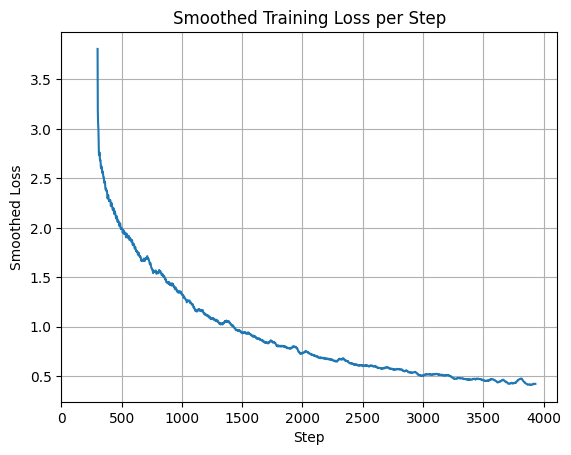

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

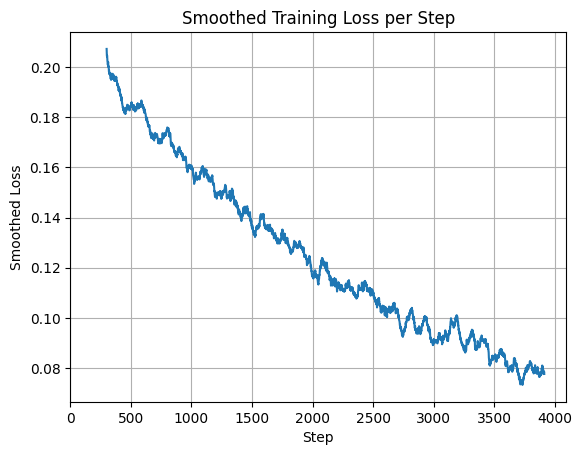

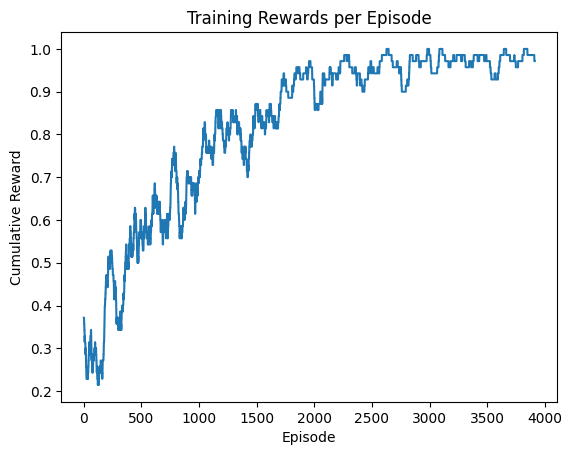

___________________________________________________________________________________________________________________________


In [97]:
# with tf.device(device_name):
#   dqn_eval2(thing=True,flag=False)
# print(np.mean(scores.history['episode_reward'])*100,'%')
# plt.plot(scores.history['episode_reward'])
# plt.title('Testing Rewards per Episode')
# plt.xlabel('Episode')
# plt.ylabel('Cumulative Reward')
# plt.show()
# print(np.mean(scores.history['episode_reward'])*100,'%')
dqn.policy.eps = 0
# train_new = np.load(file='/content/drive/MyDrive/a/bciiv2a_test_features_A02E.gdf.npy')
# train_new_labels = train_dict['A02T.gdf']['labels']
with tf.device(device_name):
  #dqn_eval(dqn,d=(X_test[len(X_test)-25:],y_test[len(y_test)-25:]))
  dqn_eval(dqn,d=(X_test,y_test))
  dqn_eval(dqn,d=(X_syn2,y_syn2))
  scores = dqn.test(Plasticity(images_per_episode=10,random=True,dataset=(X_test,y_test)), nb_episodes=100, visualize=False, action_repetition=1, verbose=0)
  print(np.mean(scores.history['episode_reward'])*100,'%')

def moving_average(data, window_size):
    return [np.mean(data[i:i+window_size]) for i in range(len(data) - window_size + 1)]
losses = loss_history.losses
losses2 = loss_history2.losses
smoothed_losses = moving_average(losses, window_size=50)
print(smoothed_losses)
plt.plot(smoothed_losses)
plt.title('Smoothed Training Loss per Step')
plt.xlabel('Step')
plt.xlim(left=0)
plt.ylabel('Smoothed Loss')
plt.grid(True)
plt.show()

smoothed_losses2 = moving_average(losses2, window_size=70)
print(smoothed_losses2)
plt.plot(smoothed_losses2)
plt.title('Smoothed Training Loss per Step')
plt.xlabel('Step')
plt.xlim(left=0)
plt.ylabel('Smoothed Loss')
plt.grid(True)
plt.show()

plt.plot(moving_average(reward_history.rewards, window_size=70))
plt.title('Training Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

print("___________________________________________________________________________________________________________________________")